<a href="https://colab.research.google.com/github/igabypy/Natural-Language-Processing/blob/main/SentimentsTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from prettytable import PrettyTable
import missingno as msno
from wordcloud import WordCloud, STOPWORDS #to create cloud words
from collections import defaultdict
import string

### <font color='purple'> To import google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/AI projects/NPL models/test.csv", encoding='latin_1')
df_train = pd.read_csv("/content/drive/MyDrive/AI projects/NPL models/train.csv", encoding='latin_1')

In [ ]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
# to see the data types
t = PrettyTable(['Inputs', 'data type'])

for i in range(len(df_train.dtypes)):
  t.add_row([f'{df_train.columns[i]}', f'{df_train.dtypes[i]}'])
print(t) 

+---------------+-----------+
|     Inputs    | data type |
+---------------+-----------+
|     textID    |   object  |
|      text     |   object  |
| selected_text |   object  |
|   sentiment   |   object  |
+---------------+-----------+


In [ ]:
# To transform or get shure that all the data are string type 

df_train['text'] = df_train['text'].astype(str)
df_train['sentiment']=df_train['sentiment'].astype(str)

df_test['text'] = df_test['text'].astype(str)
df_test['sentiment'] = df_test['sentiment'].astype(str)

In [ ]:
# We check if there are any emty space

t = PrettyTable(['inputs','# empty spaces'])

for i in range(len(df_train.columns)):
  t.add_row([f'{df_train.columns[i]}',f'{df_train.isnull().sum()[i] }'])

print(t)

+---------------+----------------+
|     inputs    | # empty spaces |
+---------------+----------------+
|     textID    |       0        |
|      text     |       0        |
| selected_text |       1        |
|   sentiment   |       0        |
+---------------+----------------+


In [ ]:
t = PrettyTable(['inputs','# empty spaces'])

for i in range(len(df_test.columns)):
  t.add_row([f'{df_test.columns[i]}',f'{df_test.isnull().sum()[i] }'])

print(t)

+-----------+----------------+
|   inputs  | # empty spaces |
+-----------+----------------+
|   textID  |       0        |
|    text   |       0        |
| sentiment |       0        |
+-----------+----------------+


In [ ]:
# We take out the duplicates and we check the new dataframe dimentions

t = PrettyTable(['Inputs', 'Dimentions'])
t.add_row([f'preciding Train', f'{df_train.shape}'])
t.add_row([f'preciding Test', f'{df_test.shape}'])

df_train.drop_duplicates()
df_test.drop_duplicates()

t.add_row([f'new Train',f'{df_train.shape}'])
t.add_row([f'new Test',f'{df_test.shape}'])

print(t)

+-----------------+------------+
|      Inputs     | Dimentions |
+-----------------+------------+
| preciding Train | (27481, 4) |
|  preciding Test | (3534, 3)  |
|    new Train    | (27481, 4) |
|     new Test    | (3534, 3)  |
+-----------------+------------+


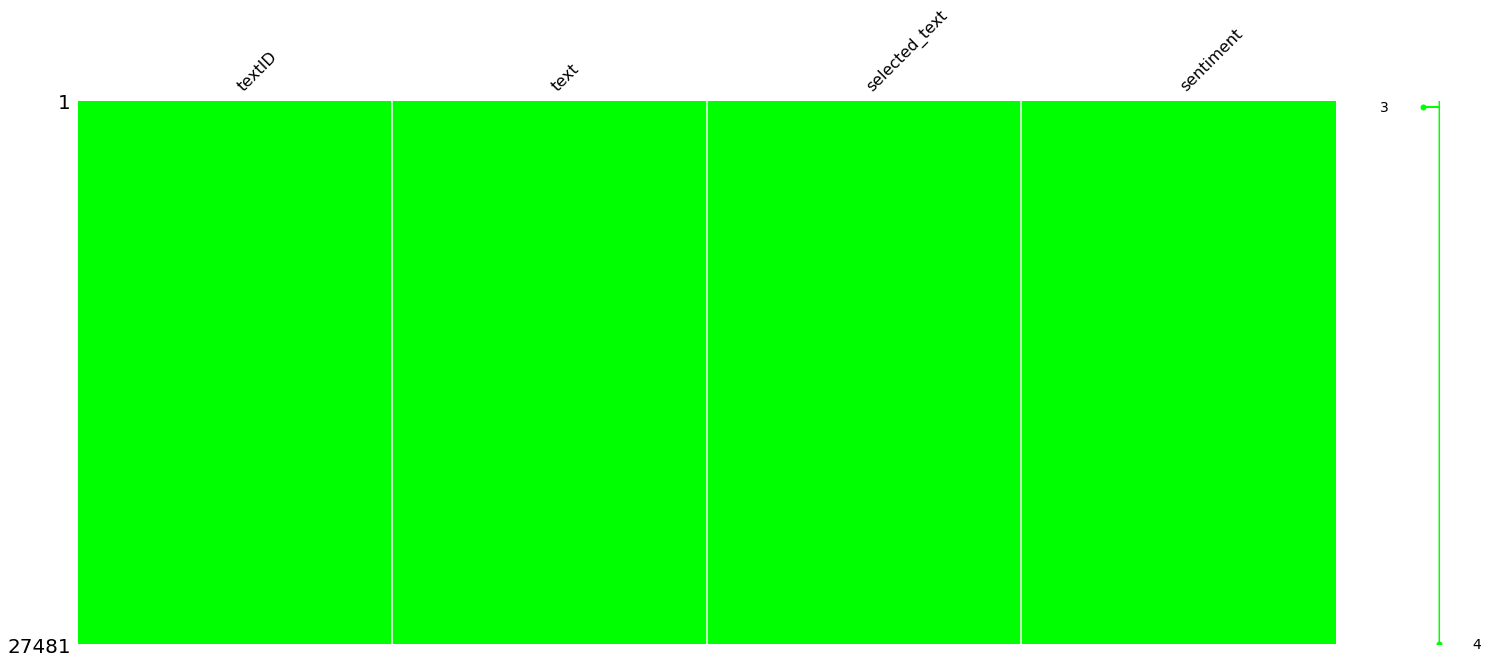

In [ ]:
# We check the nule values distribution

msno.matrix(df_train, color = (0,1,0))
plt.show()

## Data visualization

In [ ]:
df_count_train=df_train["sentiment"].value_counts()
df_count_test=df_test["sentiment"].value_counts()

df_count = df_count_train + df_count_test

t = PrettyTable(['Sentiment', 'Amount'])

for i in df_count.index:
  t.add_row([f'{i}', df_count[i]])
print(t)

+-----------+--------+
| Sentiment | Amount |
+-----------+--------+
|  neutral  | 12548  |
|  positive |  9685  |
|  negative |  8782  |
+-----------+--------+


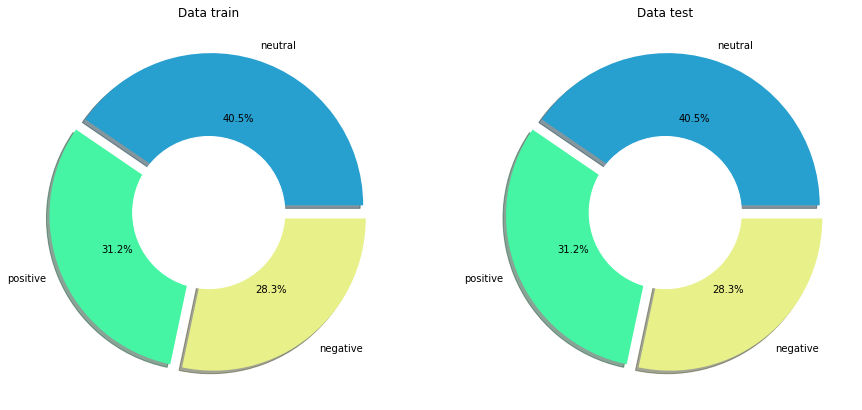

In [ ]:
# Data distribution


colors = [ "#279fcf","#45f5a3","#e7f089","#2bbabd","#2368cf" ]

plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.pie(df_count_train, labels = df_count_train.index, colors = colors, explode=(0.05,0.05,0.05), autopct="%0.1f%%",shadow = True)

circle = plt.Circle((0,0),0.5, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Data train")

plt.subplot(1, 2, 2)
plt.pie(df_count_test, labels=df_count_test.index, colors=colors, explode=(0.05,0.05,0.05), autopct="%0.1f%%",shadow = True)
circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Data test")

plt.rcParams["figure.figsize"] = (14, 6)
plt.show()


Text(0.5, 0, 'Characters Amount')

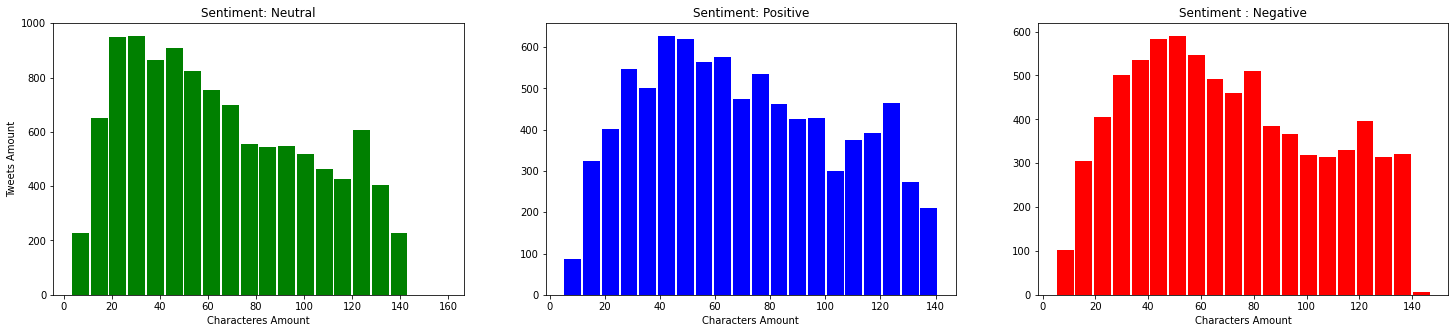

In [ ]:
# Amount of tweets characters Histogram 

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,5))

tweet_len=df_train[df_train['sentiment']=="neutral"]['text'].str.len()  #chain lenght
ax1.hist(tweet_len,bins=20,rwidth=0.9,color='g')                                            
ax1.set_title('Sentiment: Neutral')
ax1.set_ylabel('Tweets Amount')
ax1.set_xlabel('Characteres Amount')

tweet_len=df_train[df_train['sentiment']=="positive"]['text'].str.len()
ax2.hist(tweet_len,bins=20,rwidth=0.9,color='b')
ax2.set_title('Sentiment: Positive')
ax2.set_xlabel('Characters Amount')

tweet_len=df_train[df_train['sentiment']=="negative"]['text'].str.len()
ax3.hist(tweet_len,bins=20,rwidth=0.9,color='r')
ax3.set_title('Sentiment : Negative')
ax3.set_xlabel('Characters Amount')

Text(0.5, 0, 'words amount')

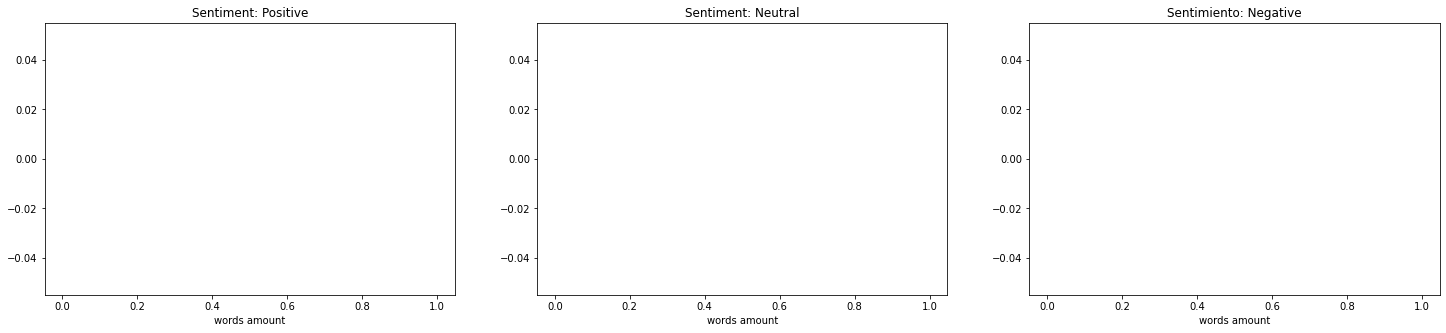

In [ ]:
#### Check this, to count tehe amount of words related with an specific sentiment 


# Amount of words in tweets_: Histogram

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,5))


tweet_len=df_train[df_train['sentiment']=="Positive"]['text'].str.split()
tweet_len=tweet_len.apply(len)
ax1.hist(tweet_len,bins=20,rwidth=0.9,color='b')
ax1.set_title('Sentiment: Positive')
ax1.set_xlabel('words amount')

tweet_len=df_train[df_train['sentiment']=="Neutral"]['text'].str.split()
tweet_len=tweet_len.apply(len)
ax2.hist(tweet_len,bins=20,rwidth=0.9,color='r')
ax2.set_title('Sentiment: Neutral')
ax2.set_xlabel('words amount')

tweet_len=df_train[df_train['sentiment']=="Negative"]['text'].str.split()
tweet_len=tweet_len.apply(len)
ax3.hist(tweet_len,bins=20,rwidth=0.9,color='k')
ax3.set_title('Sentimiento: Negative')
ax3.set_xlabel('words amount')



In [ ]:
# To create a word list, from original tweets

def palabras(df):
    for x in df['text'].str.split():     #to get a list of words of every tweet
        for i in x:
            list_palabras.append(i)               #to get all the words in one single tweet
    return list_palabras

list_palabras=[]

for i in range(5):
  palabras(df_train[int(len(df_train)*i/5):int((len(df_train)*(i+1)/5))])  #to separate the process


In [ ]:
# cloud words regarding frequency, STOPWORDS: to descart some words
print(STOPWORDS)
print("Longitud de STOPWORDS: ", len(STOPWORDS))

# to consider another unwanted words

STOPWORDS .update(["https","co","I","will","the",''])



{"why's", 'so', 'that', 'why', 'when', 'both', 'i', 'do', "i'll", "can't", "i've", 'had', 'else', 'ever', 'has', 'above', 'yourself', 'what', 'than', "they'd", 'otherwise', 'here', "it's", 'can', "wasn't", 'all', 'under', 'whom', "where's", "he'd", 'few', 'as', 'while', "we'd", 'myself', 'did', 'this', "i'm", 'hence', 'at', 'having', 'get', 'with', "didn't", 'out', 'ourselves', 'until', 'once', 'during', 'no', "aren't", 'itself', 'shall', "here's", 'the', 'where', 'nor', 'only', "i'd", 'into', 'r', 'doing', "hasn't", 'those', 'there', "couldn't", 'being', "they're", 'these', 'they', 'same', "hadn't", "she'll", 'was', "we'll", "haven't", "when's", 'you', 'com', 'on', "how's", 'off', 'again', 'too', "you're", 'how', "she's", 'could', 'yourselves', 'and', 'but', "he's", 'most', 'should', 'of', 'because', "don't", 'against', 'further', 'a', 'his', 'is', 'more', "shouldn't", 'such', 'then', "they'll", 'to', 'am', 'by', 'for', 'any', 'through', 'yours', "who's", 'herself', "shan't", 'www', '

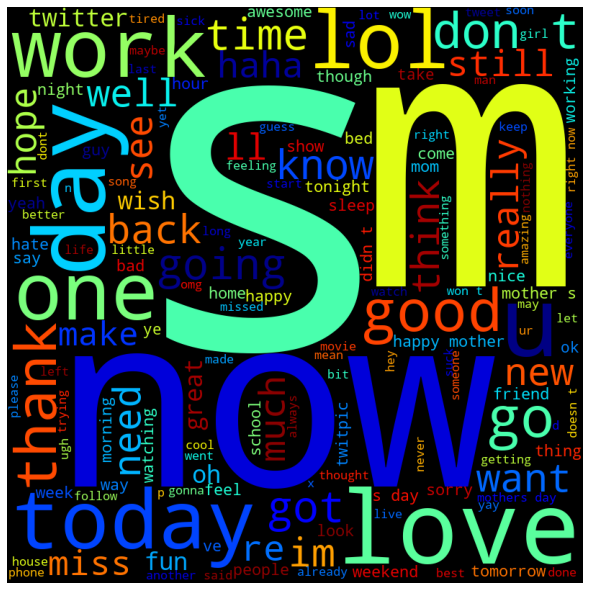

In [ ]:
 
def minusculas(list_palabras):
  comment_words = ''        #To keep all the words as str
  for val in list_palabras: 
        
      val = str(val)        #to get shure that all the elements are str
      tokens = val.split()  #to create a list of characters  
        
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower()     #to covert in minuscule letters

      comment_words += "".join(tokens)+" "  #to join in one single text chain
                                              
  return comment_words                                        

comment_words=minusculas(list_palabras)

#To generate the words map
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                colormap='jet',
                stopwords = STOPWORDS, 
                min_font_size = 15).generate(comment_words) 
  
# to plot the words cloud                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Visualizing the 10 most common words

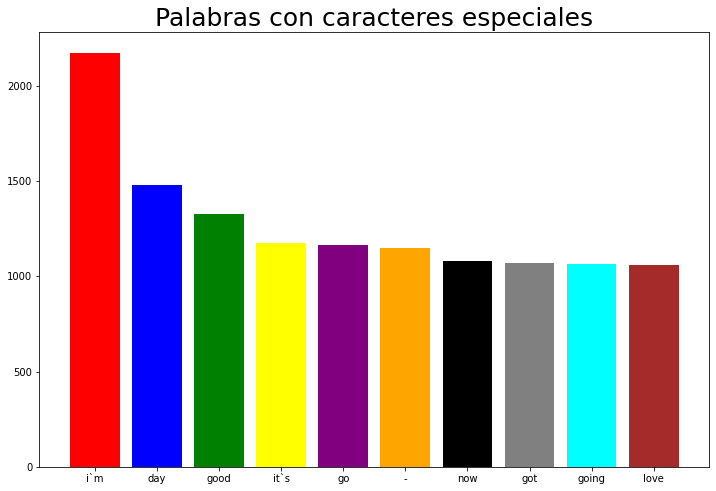

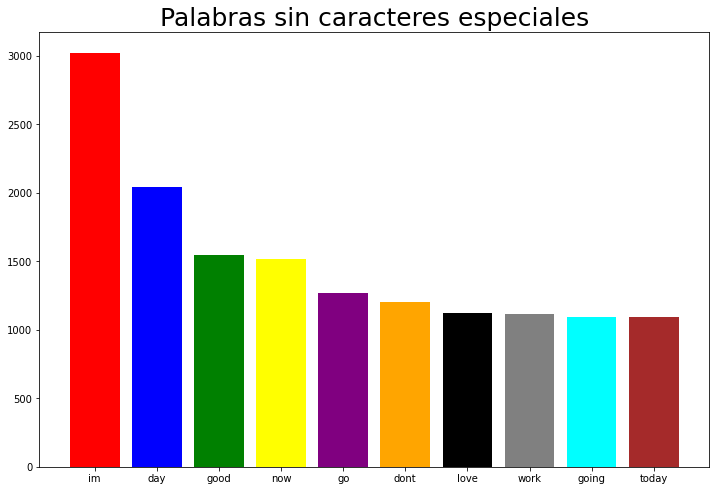

In [ ]:
dic=defaultdict(int)
comment_words=comment_words.split() #para todas las letras sean minúscula

for word in comment_words:   #contamos palabras repetidas
  if word not in STOPWORDS:
    dic[word]+=1

top=sorted(dic.items(),key=lambda x:x[1], reverse=True)[:10] #ordenamos las palabras, las más frecuentes al incio
x,y=zip(*top)   #creamos una tupla de palabras y otra de sus frecuencias

colour = [ "red", "blue", "green", "yellow", "purple", "orange", "black",'grey','cyan','brown' ]
plt.figure(figsize=(12,8))
plt.bar(x,y, color=[colour[i] for i in range(10)])
plt.title('Palabras con caracteres especiales',size=25)
plt.show()
print('')
print('') 

#función para quitar caracteres especiales de las palabras
def quitar_caracteres(text):
    text=text.translate(text.maketrans(string.punctuation,' '*len(string.punctuation))) #intercambio caracteres por espacios
    text=''.join(text.split())  #quitamos los espacios añadidos de la instruccion anterior
    return text


dic=defaultdict(int)
for word in comment_words:      #volvemos a contar palabras repetidas
  word= quitar_caracteres(word)
  if word not in STOPWORDS:
    dic[word]+=1

top=sorted(dic.items(),key=lambda x:x[1], reverse=True)[:10] #ordenamos las palabras, las más frecuentes al incio
x,y=zip(*top)   #creamos una tupla de palabras y otra de sus frecuencias

colour = [ "red", "blue", "green", "yellow", "purple", "orange", "black",'grey','cyan','brown' ]
plt.figure(figsize=(12,8))
plt.bar(x,y, color=[colour[i] for i in range(10)])
plt.title('Palabras sin caracteres especiales',size=25)
plt.show()


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
type(dic2)

collections.defaultdict